In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

import seaborn as sns

from pandas.plotting import scatter_matrix

# Set print options.

np.set_printoptions(precision = 3)

plt.style.use("ggplot") # Grammar of Graphics Theme

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

# plot inline
%matplotlib inline


from supervised_learning import SupervisedLearning
from feature_engineering import create_all_features
from performance_metrics import compute_performance_metrics

# Part 1: Passive buy and hold returns (For full period)

In [2]:
# global variables

start_date = "2006-11-01"
end_date   = "2025-11-13"  # end is *exclusive*, so this covers up to 2025-11-12
starting_capital = 100_000.0

In [3]:
spy =\
(
    yf.
    download(
        "^GSPC",
        start = start_date,
        end = end_date
    )
)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
spy

Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2006-11-01,1367.810059,1381.949951,1366.260010,1377.760010,2821160000
2006-11-02,1367.339966,1368.390015,1362.209961,1367.439941,2646180000
2006-11-03,1364.300049,1371.680054,1360.979980,1367.310059,2419730000
2006-11-06,1379.780029,1381.400024,1364.270020,1364.270020,2533550000
2006-11-07,1382.839966,1388.189941,1379.189941,1379.750000,2636390000
...,...,...,...,...,...
2025-11-06,6720.319824,6796.680176,6707.509766,6787.589844,6051900000
2025-11-07,6728.799805,6730.109863,6631.439941,6696.180176,5926070000


In [5]:
spy.columns =\
(
    spy
    .columns
    .droplevel(1) # level 0 --> Price; level 1 --> Ticker
)

spy

Price,Close,High,Low,Open,Volume
Date,,,,,
2006-11-01,1367.810059,1381.949951,1366.260010,1377.760010,2821160000
2006-11-02,1367.339966,1368.390015,1362.209961,1367.439941,2646180000
2006-11-03,1364.300049,1371.680054,1360.979980,1367.310059,2419730000
2006-11-06,1379.780029,1381.400024,1364.270020,1364.270020,2533550000
2006-11-07,1382.839966,1388.189941,1379.189941,1379.750000,2636390000
...,...,...,...,...,...
2025-11-06,6720.319824,6796.680176,6707.509766,6787.589844,6051900000
2025-11-07,6728.799805,6730.109863,6631.439941,6696.180176,5926070000
2025-11-10,6832.430176,6841.319824,6770.560059,6785.359863,5366050000


In [6]:
(
    spy
    .isna()
    .sum()
)

Price
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

<Axes: xlabel='Date'>

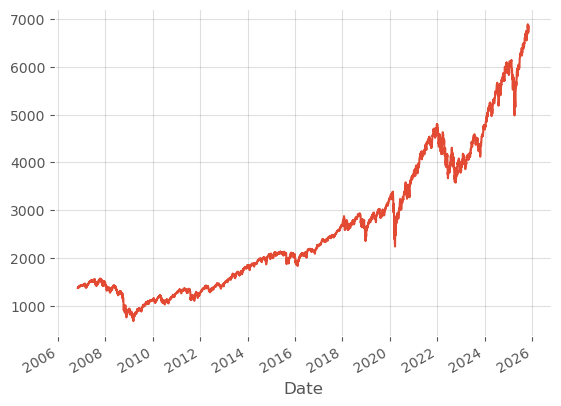

In [7]:
(
    spy['Close']
).plot()

# Part 2: Machine Learning

In [8]:
return_period = 5

## Y Variable - 5 day log return

In [9]:
Y =\
(
    np
    .log(spy['Close']
        )
    .diff(return_period)
    .shift(-return_period)
)

Y.name = 'SPY_pred'

Y

Date
2006-11-01    0.013009
2006-11-02    0.008005
2006-11-03    0.012094
2006-11-06    0.003357
2006-11-07    0.007478
                ...   
2025-11-06         NaN
2025-11-07         NaN
2025-11-10         NaN
2025-11-11         NaN
2025-11-12         NaN
Name: SPY_pred, Length: 4788, dtype: float64

# Features

1.Lagged returns

2.Simple moving averages

3.Exponential moving averages

4.RSI

5.Stochastic Oscillator

6.Volatility

7.Rate of Change

In [10]:
spy

Price,Close,High,Low,Open,Volume
Date,,,,,
2006-11-01,1367.810059,1381.949951,1366.260010,1377.760010,2821160000
2006-11-02,1367.339966,1368.390015,1362.209961,1367.439941,2646180000
2006-11-03,1364.300049,1371.680054,1360.979980,1367.310059,2419730000
2006-11-06,1379.780029,1381.400024,1364.270020,1364.270020,2533550000
2006-11-07,1382.839966,1388.189941,1379.189941,1379.750000,2636390000
...,...,...,...,...,...
2025-11-06,6720.319824,6796.680176,6707.509766,6787.589844,6051900000
2025-11-07,6728.799805,6730.109863,6631.439941,6696.180176,5926070000
2025-11-10,6832.430176,6841.319824,6770.560059,6785.359863,5366050000


In [11]:
lag_periods =  [return_period,
                       return_period * 3, # 15
                       return_period * 6, # 30
                       return_period * 12 # 60
                      ]
vol_periods = [5,10,20,60,120]
sma_periods = [21,63,252]
ema_periods = [10,30, 200]
rsi_periods = [10,30, 200]
stok_periods = [10,30, 200]
stod_periods = [10,30, 200]
roc_periods = [10,30]

X = create_all_features(
    spy,
    price_column='Close',
    lagged_return_periods=lag_periods,
    vol_periods=vol_periods,
    sma_periods=sma_periods,
    ema_periods=ema_periods,
    rsi_periods=rsi_periods,
    stok_periods=stok_periods,
    stod_periods=stod_periods,
    roc_periods=roc_periods
)

X

,5DT,15DT,30DT,60DT,VOL5,VOL10,VOL20,VOL60,VOL120,SMA21,...,RSI30,RSI200,%K10,%K30,%K200,%D10,%D30,%D200,ROC10,ROC30
Date,,,,,,,,,,,,,,,,,,,,,
2006-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-07,NaN,NaN,NaN,NaN,8.302672,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-06,-0.015067,0.013671,0.017351,0.038488,53.412746,55.651373,95.936714,137.655340,286.747747,6748.100446,...,54.873023,53.254200,6.018914,45.876180,90.408093,31.154106,57.349299,92.441377,-1.050845,1.153267
2025-11-07,-0.016420,0.009675,0.012728,0.039446,53.634395,62.924697,84.357350,136.639041,285.642805,6747.799967,...,53.669848,53.129871,33.700206,48.170795,90.814748,27.794661,53.493363,91.758022,-2.128828,1.014678
2025-11-10,-0.002856,0.014343,0.025379,0.057631,46.788344,60.058606,82.288318,136.899368,285.226894,6761.129511,...,56.820149,53.697066,69.570890,76.212346,95.784315,36.430003,56.753107,92.335719,-0.848366,2.152517


In [12]:
X.columns

Index(['5DT', '15DT', '30DT', '60DT', 'VOL5', 'VOL10', 'VOL20', 'VOL60',
       'VOL120', 'SMA21', 'SMA63', 'SMA252', 'EMA10', 'EMA30', 'EMA200',
       'RSI10', 'RSI30', 'RSI200', '%K10', '%K30', '%K200', '%D10', '%D30',
       '%D200', 'ROC10', 'ROC30'],
      dtype='object')

In [13]:
(   
    X
    .isna()
    .sum()
)

5DT         5
15DT       15
30DT       30
60DT       60
VOL5        4
VOL10       9
VOL20      19
VOL60      59
VOL120    119
SMA21      20
SMA63      62
SMA252    251
EMA10       0
EMA30       0
EMA200      0
RSI10       9
RSI30      29
RSI200    199
%K10        9
%K30       29
%K200     199
%D10       11
%D30       31
%D200     201
ROC10       9
ROC30      29
dtype: int64

In [14]:
data =\
(
    pd
    .concat([Y, X],
            axis = 1)
    .dropna()
)

In [15]:
data.shape

(4532, 27)

In [16]:
data.iloc[ : :return_period, : ].shape

(907, 27)

In [17]:
data =\
(
    data
    .iloc[ : :return_period, : ]
)

In [18]:
Y =\
(
    data
    .loc[ : , Y.name]
)

Y

Date
2007-11-01   -0.022574
2007-11-08   -0.016146
2007-11-15   -0.007227
2007-11-23    0.027683
2007-11-30    0.015755
                ...   
2025-10-07   -0.010522
2025-10-14    0.013609
2025-10-21    0.022830
2025-10-28   -0.017470
2025-11-04    0.011024
Name: SPY_pred, Length: 907, dtype: float64

In [19]:
X =\
(
    data
    .loc[ : , X.columns]
)

X

,5DT,15DT,30DT,60DT,VOL5,VOL10,VOL20,VOL60,VOL120,SMA21,...,RSI30,RSI200,%K10,%K30,%K200,%D10,%D30,%D200,ROC10,ROC30
Date,,,,,,,,,,,,,,,,,,,,,
2007-11-01,-0.003943,-0.030020,-0.006812,0.007286,15.364716,16.173971,20.181737,42.537758,35.594885,1537.491897,...,48.272346,52.079532,29.873255,21.818910,68.106158,64.127026,46.288347,78.088422,0.520444,-1.134528
2007-11-08,-0.022574,-0.043332,-0.037667,0.047256,20.483243,25.728395,23.565886,38.255426,35.757288,1523.294288,...,41.657707,51.288915,23.875034,19.446636,52.232354,24.404332,18.503714,59.516307,-3.941301,-3.404616
2007-11-15,-0.016146,-0.042663,-0.061268,-0.008864,16.603884,26.396933,31.181158,36.132212,36.959406,1501.911906,...,38.904484,50.127073,15.345327,9.174179,41.096624,27.483030,21.127746,48.848885,-3.875070,-6.833630
2007-11-23,-0.007227,-0.045947,-0.075967,-0.015879,15.110237,18.707794,40.437482,38.987483,38.719716,1483.181908,...,37.688549,49.820734,32.758087,16.807472,36.169901,18.488726,10.177943,32.252132,-0.894270,-7.753880
2007-11-30,0.027683,0.004310,-0.039022,0.001750,31.696695,24.425809,30.093032,41.714171,40.262042,1463.385236,...,44.594705,50.545718,90.584343,51.165977,55.235511,85.890850,45.815726,51.536166,1.535573,-1.298787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-07,0.003899,0.016189,0.041860,0.068736,11.787329,43.968785,55.573742,140.586815,372.704215,6643.764765,...,68.226610,53.356163,78.463655,89.870688,97.921259,84.440553,92.723009,98.512472,1.154263,3.845534
2025-10-14,-0.010522,-0.001896,0.035038,0.052323,80.509661,60.626046,52.397401,137.195695,333.405385,6667.987630,...,62.090204,53.086816,43.746560,65.480335,93.766907,31.057127,61.931549,92.360870,-0.996694,3.040360
2025-10-21,0.013609,0.006986,0.033630,0.052672,46.884770,62.900491,52.903768,137.423327,310.570780,6679.294294,...,61.226216,54.467261,86.328372,88.225124,98.485132,75.171458,80.678889,97.248904,-0.272000,3.112505


In [20]:
correlation =\
(
    data
    .corr()
)

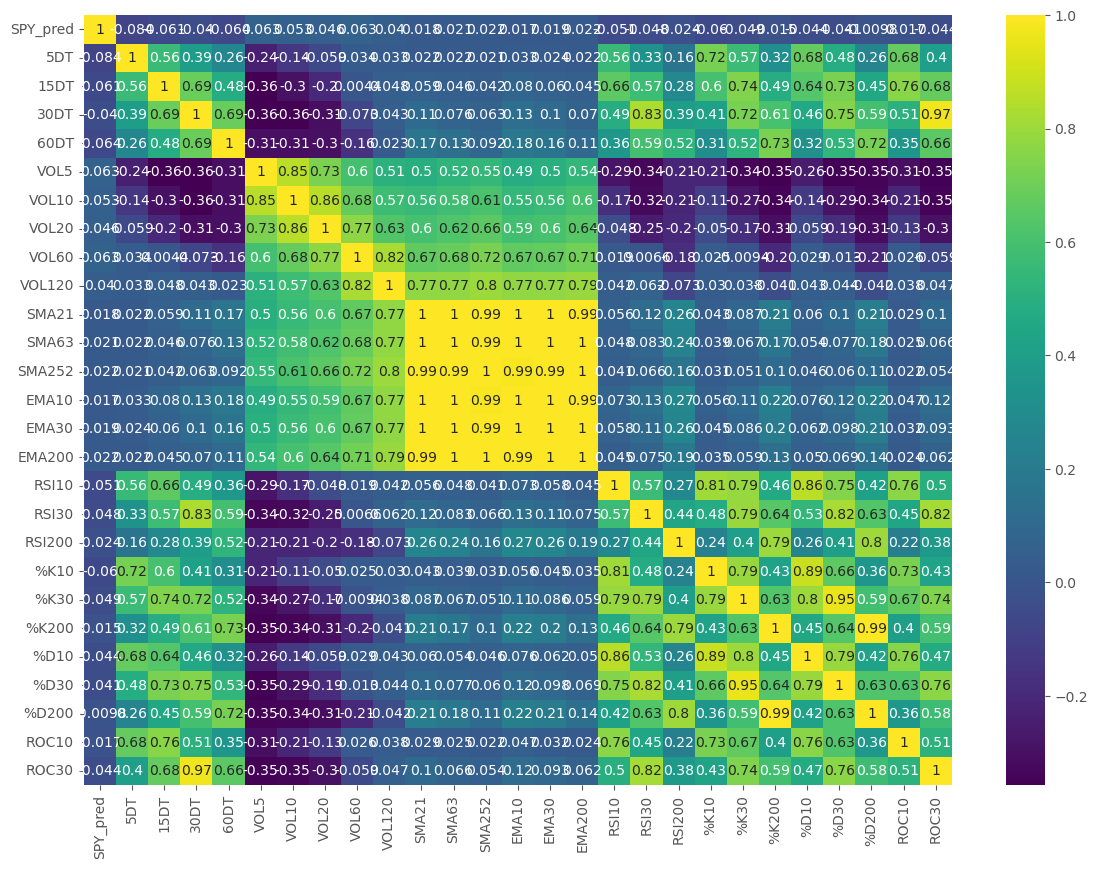

In [21]:

plt.figure(figsize=(14, 10))  # ← adjust size here

(
    sns
    .heatmap(correlation,
             cmap = "viridis",
             annot = True)
)

plt.show()

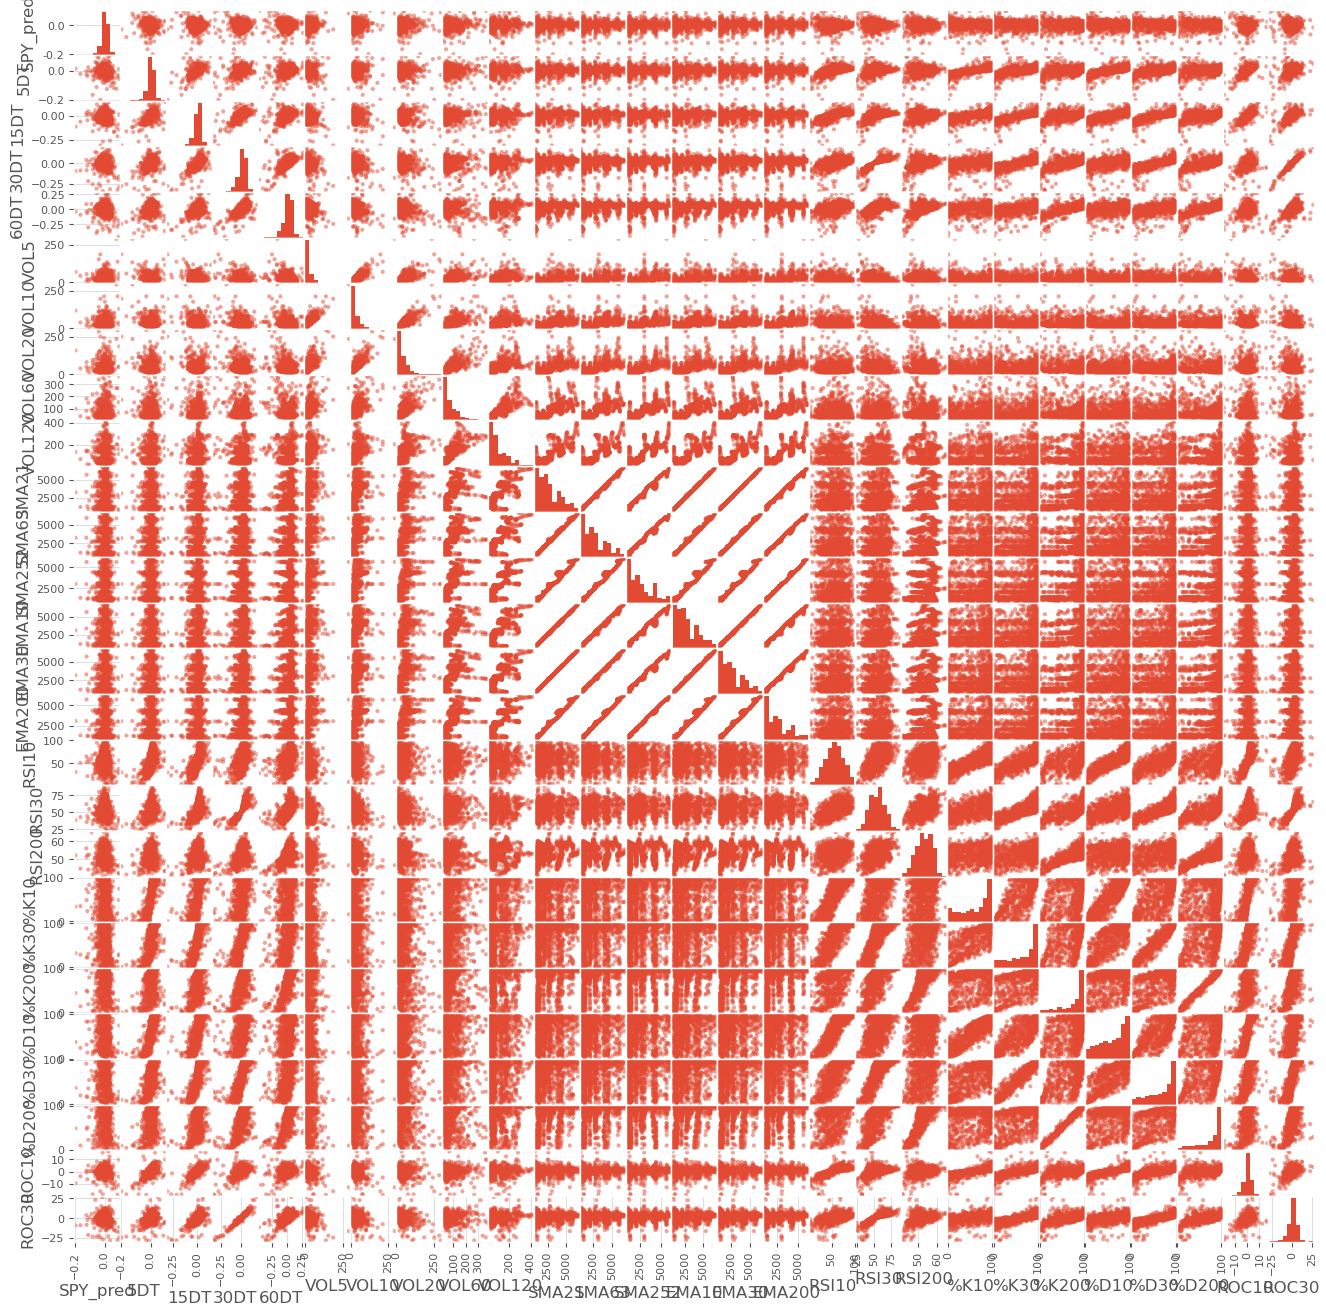

In [22]:
scatter_matrix(data,
               figsize = [16,16]
              )

plt.show()

In [23]:
SL =\
(
    SupervisedLearning()
)

In [24]:
X_train, X_test, Y_train, Y_test =\
(
    SL
    .sequential_split(X,Y,train_frac=0.75)
    
)

Sequential Split: 680 train / 227 test samples


In [25]:
seed = 2025
num_folds = 10

metric = "neg_mean_squared_error"

In [26]:
results =\
(
    SL
    .run_all_models(
        X_train = X_train,
        Y_train = Y_train,
        X_test = X_test,
        Y_test = Y_test,
        num_folds = num_folds,
        seed = seed,
        metric = metric
    )
)

LR: CV_Mean=0.0008, CV_Std=0.0003, Train_MSE=0.0007, Test_MSE=0.0007
LASSO: CV_Mean=0.0007, CV_Std=0.0003, Train_MSE=0.0007, Test_MSE=0.0006
Elastic Net Penalty: CV_Mean=0.0007, CV_Std=0.0003, Train_MSE=0.0007, Test_MSE=0.0006
Decision Tree: CV_Mean=0.0014, CV_Std=0.0005, Train_MSE=0.0000, Test_MSE=0.0045
Random Forest: CV_Mean=0.0008, CV_Std=0.0003, Train_MSE=0.0001, Test_MSE=0.0007
Extra Trees: CV_Mean=0.0008, CV_Std=0.0003, Train_MSE=0.0000, Test_MSE=0.0008
Gradient Boosting: CV_Mean=0.0008, CV_Std=0.0003, Train_MSE=0.0002, Test_MSE=0.0010
Adaptive Boosting: CV_Mean=0.0009, CV_Std=0.0002, Train_MSE=0.0006, Test_MSE=0.0007
Support Vector Machine: CV_Mean=0.0022, CV_Std=0.0002, Train_MSE=0.0023, Test_MSE=0.0031
K-Nearest Neighbors: CV_Mean=0.0008, CV_Std=0.0003, Train_MSE=0.0006, Test_MSE=0.0007


In [27]:
results['comparison_df']

,Algorithms,Data,Performance
0,LR,Training Set,6.772817e-04
1,LASSO,Training Set,7.091080e-04
2,Elastic Net Penalty,Training Set,7.091080e-04
3,Decision Tree,Training Set,0.000000e+00
4,Random Forest,Training Set,1.126503e-04
5,Extra Trees,Training Set,2.985191e-34
6,Gradient Boosting,Training Set,2.209705e-04
7,Adaptive Boosting,Training Set,5.522329e-04
8,Support Vector Machine,Training Set,2.277645e-03
9,K-Nearest Neighbors,Training Set,5.701504e-04


In [28]:
from lets_plot import *
LetsPlot.setup_html()

In [29]:
(
    SL
    .plot_performance(results['comparison_df'])
)

In [30]:
model =\
(
    SL.get_model_by_name("K-Nearest Neighbors")
)

model

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [31]:
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

In [32]:
testing_df =\
(
    spy
    .copy()
    .rename(columns={'Close': "actual_close"})
)

testing_df

Price,actual_close,High,Low,Open,Volume
Date,,,,,
2006-11-01,1367.810059,1381.949951,1366.260010,1377.760010,2821160000
2006-11-02,1367.339966,1368.390015,1362.209961,1367.439941,2646180000
2006-11-03,1364.300049,1371.680054,1360.979980,1367.310059,2419730000
2006-11-06,1379.780029,1381.400024,1364.270020,1364.270020,2533550000
2006-11-07,1382.839966,1388.189941,1379.189941,1379.750000,2636390000
...,...,...,...,...,...
2025-11-06,6720.319824,6796.680176,6707.509766,6787.589844,6051900000
2025-11-07,6728.799805,6730.109863,6631.439941,6696.180176,5926070000
2025-11-10,6832.430176,6841.319824,6770.560059,6785.359863,5366050000


In [33]:
testing_df.loc[X_test.index, "pred_return"] = y_pred
testing_df

Price,actual_close,High,Low,Open,Volume,pred_return
Date,,,,,,
2006-11-01,1367.810059,1381.949951,1366.260010,1377.760010,2821160000,NaN
2006-11-02,1367.339966,1368.390015,1362.209961,1367.439941,2646180000,NaN
2006-11-03,1364.300049,1371.680054,1360.979980,1367.310059,2419730000,NaN
2006-11-06,1379.780029,1381.400024,1364.270020,1364.270020,2533550000,NaN
2006-11-07,1382.839966,1388.189941,1379.189941,1379.750000,2636390000,NaN
...,...,...,...,...,...,...
2025-11-06,6720.319824,6796.680176,6707.509766,6787.589844,6051900000,NaN
2025-11-07,6728.799805,6730.109863,6631.439941,6696.180176,5926070000,NaN
2025-11-10,6832.430176,6841.319824,6770.560059,6785.359863,5366050000,NaN


In [34]:
testing_df["pred_close"] =\
(
    testing_df["actual_close"] 
    * np.exp(testing_df["pred_return"])
)

testing_df

Price,actual_close,High,Low,Open,Volume,pred_return,pred_close
Date,,,,,,,
2006-11-01,1367.810059,1381.949951,1366.260010,1377.760010,2821160000,NaN,NaN
2006-11-02,1367.339966,1368.390015,1362.209961,1367.439941,2646180000,NaN,NaN
2006-11-03,1364.300049,1371.680054,1360.979980,1367.310059,2419730000,NaN,NaN
2006-11-06,1379.780029,1381.400024,1364.270020,1364.270020,2533550000,NaN,NaN
2006-11-07,1382.839966,1388.189941,1379.189941,1379.750000,2636390000,NaN,NaN
...,...,...,...,...,...,...,...
2025-11-06,6720.319824,6796.680176,6707.509766,6787.589844,6051900000,NaN,NaN
2025-11-07,6728.799805,6730.109863,6631.439941,6696.180176,5926070000,NaN,NaN
2025-11-10,6832.430176,6841.319824,6770.560059,6785.359863,5366050000,NaN,NaN


In [35]:
testing_df =\
(
    testing_df
    .dropna()
)

testing_df

Price,actual_close,High,Low,Open,Volume,pred_return,pred_close
Date,,,,,,,
2021-05-06,4201.620117,4202.700195,4147.330078,4169.140137,4511000000,0.011195,4248.922746
2021-05-13,4112.500000,4131.580078,4074.989990,4074.989990,4779540000,0.011195,4158.799298
2021-05-20,4159.120117,4172.799805,4121.970215,4121.970215,3978880000,0.011195,4205.944273
2021-05-27,4200.879883,4213.379883,4197.779785,4201.939941,6406310000,0.011195,4248.174178
2021-06-04,4229.890137,4233.450195,4206.049805,4206.049805,4139790000,0.011195,4277.511034
...,...,...,...,...,...,...,...
2025-10-07,6714.589844,6754.490234,6699.959961,6746.140137,5546150000,0.011195,6790.183958
2025-10-14,6644.310059,6680.700195,6555.069824,6602.490234,5666920000,0.011195,6719.112949
2025-10-21,6735.350098,6752.160156,6722.029785,6736.750000,5245020000,0.011195,6811.177934


<Axes: xlabel='Date'>

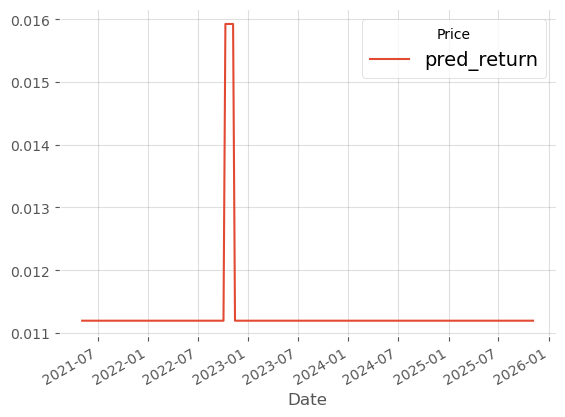

In [36]:
(
    testing_df
    [['pred_return']]
).plot()

In [37]:
testing_df['pred_return'].describe()

count    227.000000
mean       0.011299
std        0.000696
min        0.011195
25%        0.011195
50%        0.011195
75%        0.011195
max        0.015925
Name: pred_return, dtype: float64

In [38]:
def generate_signal_simple(df: pd.DataFrame):
    df = df.copy()
    df['signal'] = (df['pred_return'] > 0).astype(int)

    df['positions'] = df['signal'] 
    # no need to shift(1) cause we using predicted returns
    return df

In [39]:
testing_df =\
(
    generate_signal_simple(testing_df)
    .dropna()
)
testing_df

Price,actual_close,High,Low,Open,Volume,pred_return,pred_close,signal,positions
Date,,,,,,,,,
2021-05-06,4201.620117,4202.700195,4147.330078,4169.140137,4511000000,0.011195,4248.922746,1,1
2021-05-13,4112.500000,4131.580078,4074.989990,4074.989990,4779540000,0.011195,4158.799298,1,1
2021-05-20,4159.120117,4172.799805,4121.970215,4121.970215,3978880000,0.011195,4205.944273,1,1
2021-05-27,4200.879883,4213.379883,4197.779785,4201.939941,6406310000,0.011195,4248.174178,1,1
2021-06-04,4229.890137,4233.450195,4206.049805,4206.049805,4139790000,0.011195,4277.511034,1,1
...,...,...,...,...,...,...,...,...,...
2025-10-07,6714.589844,6754.490234,6699.959961,6746.140137,5546150000,0.011195,6790.183958,1,1
2025-10-14,6644.310059,6680.700195,6555.069824,6602.490234,5666920000,0.011195,6719.112949,1,1
2025-10-21,6735.350098,6752.160156,6722.029785,6736.750000,5245020000,0.011195,6811.177934,1,1


## Performance

In [40]:
def compute_cumulative_returns(df, 
                       position_column = 'positions',
                       price_column = 'Close'):
    df = df.copy()

    df["passive_returns"] =\
    (
        np
        .log(df[price_column]
            /
            df[price_column].shift(1)
            )
    )

    df['strategy_returns'] =\
    (
        df[position_column].shift(1)
        *
        df['passive_returns']
    )

    df['cum_log_returns'] =\
    (
        df['strategy_returns']
        .cumsum()
    )

    df['cumulative_returns_strategy'] =\
    (
        np.exp(
            df['cum_log_returns']
        )
    )

    df['cumulative_max_strategy'] =\
    (
        df['cumulative_returns_strategy']
        .cummax()
    )

    df['cumulative_returns_passive'] =\
    (
        np.exp(
            df['passive_returns']
            .cumsum()
        )
    )
    return df

In [41]:
testing_df =\
(
    compute_cumulative_returns(
        df = testing_df,
        position_column='positions',
        price_column = 'actual_close'
    )
)
testing_df

Price,actual_close,High,Low,Open,Volume,pred_return,pred_close,signal,positions,passive_returns,strategy_returns,cum_log_returns,cumulative_returns_strategy,cumulative_max_strategy,cumulative_returns_passive
Date,,,,,,,,,,,,,,,
2021-05-06,4201.620117,4202.700195,4147.330078,4169.140137,4511000000,0.011195,4248.922746,1,1,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-13,4112.500000,4131.580078,4074.989990,4074.989990,4779540000,0.011195,4158.799298,1,1,-0.021439,-0.021439,-0.021439,0.978789,0.978789,0.978789
2021-05-20,4159.120117,4172.799805,4121.970215,4121.970215,3978880000,0.011195,4205.944273,1,1,0.011272,0.011272,-0.010167,0.989885,0.989885,0.989885
2021-05-27,4200.879883,4213.379883,4197.779785,4201.939941,6406310000,0.011195,4248.174178,1,1,0.009990,0.009990,-0.000176,0.999824,0.999824,0.999824
2021-06-04,4229.890137,4233.450195,4206.049805,4206.049805,4139790000,0.011195,4277.511034,1,1,0.006882,0.006882,0.006706,1.006728,1.006728,1.006728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-07,6714.589844,6754.490234,6699.959961,6746.140137,5546150000,0.011195,6790.183958,1,1,0.003899,0.003899,0.468813,1.598095,1.598095,1.598095
2025-10-14,6644.310059,6680.700195,6555.069824,6602.490234,5666920000,0.011195,6719.112949,1,1,-0.010522,-0.010522,0.458291,1.581369,1.598095,1.581369
2025-10-21,6735.350098,6752.160156,6722.029785,6736.750000,5245020000,0.011195,6811.177934,1,1,0.013609,0.013609,0.471900,1.603036,1.603036,1.603036


<Axes: xlabel='Date'>

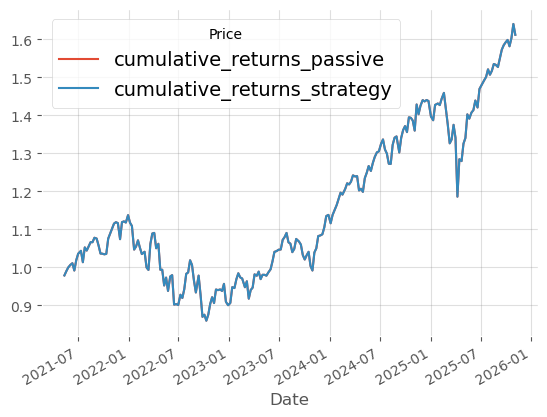

In [42]:
(
    testing_df
    [['cumulative_returns_passive', 'cumulative_returns_strategy']]
).plot()

In [43]:
print(f"Cumulative Returns (Passive): {testing_df['cumulative_returns_passive'].iloc[-1]:.2f}")
print(f"Cumulative Returns (Strategy): {testing_df['cumulative_returns_strategy'].iloc[-1]:.2f}")

Cumulative Returns (Passive): 1.61
Cumulative Returns (Strategy): 1.61


In [44]:
testing_df.head(1)

Price,actual_close,High,Low,Open,Volume,pred_return,pred_close,signal,positions,passive_returns,strategy_returns,cum_log_returns,cumulative_returns_strategy,cumulative_max_strategy,cumulative_returns_passive
Date,,,,,,,,,,,,,,,
2021-05-06,4201.620117,4202.700195,4147.330078,4169.140137,4511000000,0.011195,4248.922746,1,1,NaN,NaN,NaN,NaN,NaN,NaN


## Performance Metrics

In [48]:
passive_metrics=\
(
    compute_performance_metrics(
        log_returns=testing_df['passive_returns'],
        initial_capital=100_000,
        strategy='passive'
    )
).T

passive_metrics

,passive
CAGR,0.112
Volatility,0.381
Max Drawdown,0.244
Sharpe Ratio,1.589
Sortino Ratio,2.474
Calmar Ratio,0.461
Final Portfolio Value,161165.208
Cumulative Return,1.612


In [49]:
strategy_metrics=\
(
    compute_performance_metrics(
        log_returns=testing_df['strategy_returns'],
        initial_capital=100_000
    )
).T

strategy_metrics

,ML
CAGR,0.112
Volatility,0.381
Max Drawdown,0.244
Sharpe Ratio,1.589
Sortino Ratio,2.474
Calmar Ratio,0.461
Final Portfolio Value,161165.208
Cumulative Return,1.612


In [50]:
summary_stats=\
(
    pd.concat(
        [strategy_metrics, passive_metrics],
        axis=1
    )
)

print(summary_stats)

                               ML     passive
CAGR                        0.112       0.112
Volatility                  0.381       0.381
Max Drawdown                0.244       0.244
Sharpe Ratio                1.589       1.589
Sortino Ratio               2.474       2.474
Calmar Ratio                0.461       0.461
Final Portfolio Value  161165.208  161165.208
Cumulative Return           1.612       1.612
